# Gene activity

This notebook generates gene activities for mono- and co-cultures at T0 and T24.

# 0. load data

# 0.1. import general Python modules

In [1]:
import pandas, os, numpy, seaborn
import matplotlib, matplotlib.pyplot

## 0.2. import MINER

In [2]:
# retrieve code from GitHub
if os.path.exists('miner_py3.py') == True:
    print('miner_py3.py already exists')
else:
    !wget https://raw.githubusercontent.com/MattWallScientist/miner3/master/miner/src/miner_py3.py

miner_py3.py already exists


In [3]:
import miner_py3 as miner

## 0.3 Paths to files

In [4]:
mechanistic_inference_results = '/Users/alomana/backups/cdi/miner_results_merged/mechanistic_inference_results/'
bicluster_membership_results = '/Users/alomana/backups/cdi/miner_results_merged/bicluster_membership_results/'

## 0.4. load MINER network

In [5]:
regulonDf = pandas.read_csv(os.path.join(mechanistic_inference_results, "regulonDf.csv"), index_col=0, header=0)

In [6]:
overExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"overExpressedMembers.csv"), index_col=0, header=0)
overExpressedMembersMatrix.index = numpy.array(overExpressedMembersMatrix.index).astype(str)

underExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"underExpressedMembers.csv"), index_col=0, header=0)
underExpressedMembersMatrix.index = numpy.array(underExpressedMembersMatrix.index).astype(str)

diff_matrix = overExpressedMembersMatrix-underExpressedMembersMatrix

# 1. infer regulon-based gene activity

In [7]:
network_activity_diff = miner.networkActivity(regulon_matrix=regulonDf.copy(), reference_matrix=diff_matrix.copy(), minRegulons=2)

ALO ENSG00000111011 [   0  177  202  254  318  379  415  451  512  707  785  810  856  866
  906  931  969  989 1041 1167]
ALO ENSG00000219626 [   0   43   68  154  177  202  254  318  354  411  415  441  451  488
  512  537  573  598  665  670  785  856  866  898  989 1026 1041 1066
 1155 1167]
ALO ENSG00000123146 [   0   43   68   93  129  177  254  318  411  415  451  488  548  598
  617  707  732  785  856  866  906  931  969  989 1026 1041 1066 1167]
ALO ENSG00000164548 [   0   25   43   68   93  115  154  177  237  254  276  318  379  415
  451  476  488  537  548  573  598  785  846  856  866  887  906  931
  969  989 1026 1041 1066 1099 1143 1167]
ALO ENSG00000206560 [   0    1  115  117  154  155  177  181  276  277  293  354  379  415
  418  441  451  452  548  573  598  670  673  707  856  866  931  969
  989 1018 1026 1041 1066 1155 1167 1567 2422 2467 2485 2512]
ALO ENSG00000198815 [   0   25   28   68   93  177  183  237  254  293  379  411  415  420
  512  548  573  598 

ALO ENSG00000131381 [   0   17  177  202  237  247  254  276  293  302  354  376  379  415
  431  451  488  512  537  548  567  573  588  598  606  707  785  810
  856  866  969  989  999 1026 1041 1062 1066 1124 1167 1515 1685 1862
 2594 2844 2846 3001 3448]
ALO ENSG00000156671 [   0   25   43   68  154  177  202  220  237  254  379  411  415  451
  512  548  573  598  695  707  785  810  821  856  866  887  906  931
  969  989 1026 1041 1066 1155 1167]
ALO ENSG00000153201 [   0  488  512  537  856  887  989 1026]
ALO ENSG00000100888 [   0   43   93  129  154  237  415  548  573  598  707  742  856  866
  906  931  969  989 1066 1091]
ALO ENSG00000138802 [   0   43   68  177  237  254  343  354  379  441  537  548  573  642
  746  821  856  887  898  989 1026 1155 1167]
ALO ENSG00000110367 [   0   43   68  129  136  177  202  207  220  254  293  354  362  379
  415  441  479  488  512  526  537  548  573  576  598  617  670  695
  707  716  742  746  785  797  810  856  866  931  956 

ALO ENSG00000154845 [   0  173  202  237  254  318  354  379  479  488  573  642  670  707
  785  821  856  866  906  931  989 1026 1041]
ALO ENSG00000152102 [   0    4   43   47  129  133  177  186  254  318  321  354  359  404
  488  493  537  573  581  617  665  746  751  785  856  866  989  993
 1026 1028 1041 1066 1124 1127 1167 1260 2086 2799 3465]
ALO ENSG00000126775 [   0   43   68   93  177  220  254  293  318  379  411  415  451  548
  598  642  665  785  856  906  956  969 1041 1099]
ALO ENSG00000275272 [   0  115  177  202  237  254  276  293  343  354  415  451  488  537
  785  810  856  906  969  989 1026 1091 1143]
ALO ENSG00000122299 [   0   25   43   44   68   69   93   94  154  177  179  220  221  293
  295  354  355  415  417  512  513  548  549  573  575  598  599  707
  708  742  746  747  821  823  856  866  867  887  888  969  989  991
 1026 1041 1042 1066 1099 1155 1167 1373 1446 1565 1666 1700 1709 1728
 1788 1797 1899 1945 1981]
ALO ENSG00000157540 [   0   25 

ALO ENSG00000179564 [   1  788 2475 2485]
ALO ENSG00000083097 [   1   96  184  320  387  491  552  600  990 1027 1045 1231 1675 2585
 2835 3185 3204 3214 3232 3263 3285 3294]
ALO ENSG00000069956 [   1    4   47   71   98  112  181  186  277  294  321  344  359  452
  456  493  515  518  555  581  601  646  673  675  712  733  751  788
  827  938  967  985  993 1007 1028 1039 1566 1567 1587 1607 1676 1847
 1928 2086 2305 2309 2406 2442 2453 2799 2896 3178 3213 3253 3465 3538]
ALO ENSG00000124788 [   1  155  181  294  344  418  452  515  788 1567 1847 1928 2305 2410
 2422 2442 2467 2475 2485 2520]
ALO ENSG00000171105 [   1   96  157  184  387  491  552  600  990 1045 1675 1767 2111 2565
 3203 3204 3280 3285]
ALO ENSG00000196730 [   1   96  157  184  224  320  491  552  600  990 1027 1045 2565 2585
 2835 3204 3257 3263 3280 3285 3294]
ALO ENSG00000139636 [   1 2410 2475]
ALO ENSG00000104312 [   1   91  117  181  261  277  287  294  344  418  452  462  515  585
  788  863  901  924  982 13

ALO ENSG00000213625 [   2   99  136  207  362  526  576  644  716  797  933  964  975 1052
 1320 1376 1680 1916 1986 2783 2817 3326 3481 3937]
ALO ENSG00000111707 [   2   99  362  526  644  716  797  975 1320 1680 1730 1986 3035 3326
 3481]
ALO ENSG00000163507 [   2   74  524  576  644  914  994 1677 1850 3149]
ALO ENSG00000100697 [   2  489  494  575  576  643  644  734  823  867  870 1093 1326 1635
 1666 1677 1693 1708 1788 1797 1917 1976 2488 3149]
ALO ENSG00000078674 [   2   99  136  207  362  576  716  797  933  964  975 1052 1376 1680
 1730 1916 2783 2817 3035 3104 3937]
ALO ENSG00000167522 [   2   99  136  207  362  526  576  716  797  908  975 1052 1376 1680
 1730 1916 1986 2101 2765 2783 3732 3819]
ALO ENSG00000113810 [   2   74  223  357  494  524  576  644  715  734  753  870  914  933
  945  994 1048 1097 1213 1326 1328 1677 1704 1850 1863 2264 2298 2488
 2784 2944 3014 3098 3149 3879]
ALO ENSG00000158669 [   2   99  136  207  576  716  797  964 1052 1376 1680 2241]
ALO ENS

ALO ENSG00000101290 [   4   47   52   71  133  138  159  186  294  300  321  422  456  493
  555  581  601  712  773  780  789  799  938  993 1028 1566 1570 1676
 2309 2406 2408 2412 2479 2493 2964 2997 3000 3213 3283 3417 3465 3803]
ALO ENSG00000148339 [   4   98  186  294  321  359  422  456  481  493  518  555  601  646
  789  915  938  993 1028 1527 1676 2427 2536 2666 2896 2997 3131 3159
 3538]
ALO ENSG00000123094 [   4   47   71   98  103  133  159  186  321  336  359  422  456  481
  493  518  555  581  589  601  675  690  712  733  738  773  789  827
  993 1028 1127 1454 1676 2077 2536 2666 2855 2896 2901 2997 3009 3192
 3213 3256 3465 3506 3542]
ALO ENSG00000170385 [   4   47   52   71  133  138  186  294  300  359  422  493  555  581
  601  751  758  789  799  993 1028 1292 1566 1570 1607 1627 1676 2412
 2964 2997 3000 3009 3131 3417]
ALO ENSG00000118260 [   4   47   71   92   98  103  133  186  294  320  321  359  422  448
  456  468  472  481  493  518  555  581  589  601  

ALO ENSG00000198924 [   8 3378]
ALO ENSG00000121940 [   8   16  365  461  586 3378 4008]
ALO ENSG00000109572 [   8   12  366 1168 2388 2494 2566 2705 3235 3378]
ALO ENSG00000057608 [   8   11  897 2451 2491 2739 3378 3881]
ALO ENSG00000106460 [   8 3378]
ALO ENSG00000109814 [8]
ALO ENSG00000163104 [   8 3378]
ALO ENSG00000120800 [   8 1863 3378 3742 3881]
ALO ENSG00000077147 [   8 3378]
ALO ENSG00000143457 [   8 3378]
ALO ENSG00000141367 [   8   11   16  365  461  586  648  960 1630 1838 1952 2387 2487 2491
 2739 3437 3480 3565 4008 4009]
ALO ENSG00000118246 [8]
ALO ENSG00000132623 [   8 3378]
ALO ENSG00000129317 [   8 3378]
ALO ENSG00000183808 [8]
ALO ENSG00000198301 [   8 3378]
ALO ENSG00000070367 [   8   61 1084 3244 3378]
ALO ENSG00000144867 [8]
ALO ENSG00000124783 [   8 1546 3271 3378]
ALO ENSG00000185009 [  8 401]
ALO ENSG00000135316 [   8  897 3378]
ALO ENSG00000164168 [   8 3378]
ALO ENSG00000110917 [   8 3378]
ALO ENSG00000169359 [   8  897 3378]
ALO ENSG00000115808 [   9  137

ALO ENSG00000023318 [  14  633 1706 3718 3901]
ALO ENSG00000175110 [  14  633 1081 3765 4007]
ALO ENSG00000150527 [  14 1081 1672 1706 1838 2486 2763 3901 4007]
ALO ENSG00000165678 [  14   51 1074 1081 1672 2260 2486 2971 4007]
ALO ENSG00000126067 [  14  602 1030 1081 1439 2105 3901 4007]
ALO ENSG00000106615 [  15   78  101  498  557 1057 3221]
ALO ENSG00000088179 [  15   62   78  101  264  498  557 1057 1134 1720 2788 3221 3240 3247]
ALO ENSG00000179010 [  15   78  101  498  557 1057 2537 3221]
ALO ENSG00000117228 [  15   78  498 1057 3221 3284]
ALO ENSG00000164603 [  15  557 1057 1145 3221]
ALO ENSG00000109189 [  15   78  208  498  557  560  679 1057 2445 3221 3240 3282 3468 3614]
ALO ENSG00000168818 [  15   78  101  498  557 1057 3240]
ALO ENSG00000067064 [  15  305  498 1057 1145 1304 2249 2537 2645 2902 3221]
ALO ENSG00000092607 [  15   78  101  498  557 1057 3221 3240]
ALO ENSG00000127993 [  15  101  498  557  740 1057 2537 3221]
ALO ENSG00000151327 [  15   78 1145 2019 3240 3369

ALO ENSG00000167081 [  21  214  929 1651 1734 1747]
ALO ENSG00000134215 [  21  214  335  929 1747]
ALO ENSG00000130684 [21]
ALO ENSG00000138623 [  22  764 1995 2221 2911]
ALO ENSG00000115306 [  22  764 1787 2748 2911 4074]
ALO ENSG00000164236 [  22  351 1776 1995 2416 2792 3005 3875]
ALO ENSG00000047849 [  22  691  764 1776 2792 2911 3005 3875 4074]
ALO ENSG00000165997 [  22  620  714  764  793  990 1029 1776 1879 1995 2416 3215 3515 3722
 3875 4074]
ALO ENSG00000108375 [  22  351  691 1995 2416 2911 3005 3875]
ALO ENSG00000132938 [  22  351 1776 1995]
ALO ENSG00000104218 [  22  351  691 1995 2416 2792 3875 4074]
ALO ENSG00000158615 [  22  764 1776 2792 3875 4074]
ALO ENSG00000162852 [  22  351  691 1995 2792 2911 3005 3875 4074]
ALO ENSG00000178295 [  22  351  691  764 1776 1995 2416 2792 2911 3875 4074]
ALO ENSG00000154258 [  22  139  363  368  691  764 1776 1995 2416 2674 2911 3005 3970 4074]
ALO ENSG00000152601 [  23  267  339  434  544  688 1118 1135 1378 1583 1616 2671 3110 3250


ALO ENSG00000108387 [  29  798 1054 1413 1812 2140 2967 3169 3404 3851 3936]
ALO ENSG00000141447 [  29  584  798 1054 1413 2738 2967 3169 3404 3851 3936]
ALO ENSG00000135124 [  29  406  584  754  794  798 1054 2081 2129 2132 2137 2140 2860 2915
 3169 3404 3712 3800 3936]
ALO ENSG00000197879 [  29   37  406  669  798  844 1054 1789 1812 2102 2115 2140 2188 2718
 2738 2764 2779 2903 3108 3169 3183 3363 3588]
ALO ENSG00000145819 [  29  584  798 1054 1413 2308 2738 3169]
ALO ENSG00000116285 [  29  584  798 1054 1413 2081 2132 2140 2308 3169 3898 3936]
ALO ENSG00000141068 [  29  584  798 1054 1413 1812 2081 2132 2140 2993 3169 3404 3797 3851]
ALO ENSG00000131408 [  29  118  296  356  406 1054 1413 1533 2134 2140 2226 3169 3936]
ALO ENSG00000107819 [  29  798 1054 1812 2738 3169]
ALO ENSG00000082438 [  29  170  406  584  798 1413 1812 2081 2132 2140 2738 3169 3851]
ALO ENSG00000039523 [  29   45   95  116  131  256  280  384  457  553  574  584  792  798
  848  859  908 1044 1054 1440 1568 1

ALO ENSG00000104517 [  44   69   94  179  203  238  417  489  513  549  599  708  786  867
  877  909  932  958  991 1005 1019 1042 1175 1282 1288 1373 1557 1565
 1589 1628 1653 1666 1709 1722 1758 1766 1773 1788 1797 1804 1899 1927
 1932 1945 1976 1981 2076 2867 2952 4030 4075]
ALO ENSG00000109920 [  44   57   69   94  179  193  203  221  417  489  513  520  549  575
  599  618  696  708  786  823  991 1001 1019 1042 1446 1565 1606 1624
 1628 1728 1732 1741 1758 1788 1797 1829 1837 1890 1899 1932 1981 2681
 3138]
ALO ENSG00000168916 [  44   69   94  179  203  221  238  295  332  355  417  485  489  513
  528  549  575  599  618  639  708  747  786  867  909  932  952  958
  991 1013 1019 1042 1063 1093 1226 1282 1373 1557 1565 1589 1624 1625
 1628 1635 1647 1666 1708 1709 1766 1797 1804 1829 1837 1846 1890 1896
 1899 1914 1917 1932 1968 1976 1981 2006 2269 2679 2820 3976 4041]
ALO ENSG00000198081 [  44   94  238  355  417  513  549  575  599  708  747  786  867  909
  932  991 1042 13

ALO ENSG00000100505 [  46 1071]
ALO ENSG00000262599 [  46 1384 2584 2663 2906 3186 3563]
ALO ENSG00000187109 [  46 1071 1395 2584 2663 3072 3563]
ALO ENSG00000163297 [  46 1071 1384 2584 2663 3072 3186 3563]
ALO ENSG00000181634 [  46 1071 1395 2584 2663 2982 3072 3563]
ALO ENSG00000153214 [  46 1071 2584 2663]
ALO ENSG00000103769 [  46 1071 1395 2982 3186 3563]
ALO ENSG00000010404 [  47   54  396  827 1453 2430 3542]
ALO ENSG00000179134 [  47  186  518  601  915 1028 1158 1607 1676 2238 3009 3213]
ALO ENSG00000133106 [  48   70  222  972 1069 1701 2945 3581 3672 3900 3919]
ALO ENSG00000135899 [  48   70  677  972 1069 2827 2945 3900 3919]
ALO ENSG00000115415 [  48   70  222  972 1069 1701 2650 2945 3629 3900 3919]
ALO ENSG00000198732 [  48   70 2945]
ALO ENSG00000273936 [  48  142  244  972 1069 3341 3581 4049]
ALO ENSG00000164465 [  48   70  222  236  677  972 1069 1473 1701 2650 3581 3629 3889 3900]
ALO ENSG00000164342 [  48   70  222  677  972 1069 1701 2650 2945 3581 3900]
ALO ENSG

ALO ENSG00000109320 [  56  427  561  802  829  997 1058 1540 1935 2432 2811 3834]
ALO ENSG00000096401 [  56  279  416  427  454  516  550  561  574  802  850  970  978  983
 1043 1058 1125 1146 1286 1540 2030 2256 2391 3239 3619 3834]
ALO ENSG00000110880 [  56   82  209  427  561  678  759  802  829  978 1058 1540 1852 2391
 2432 2811 2862 3239]
ALO ENSG00000143622 [  56  427  561  678  802  997 1540 1935 2432 3416]
ALO ENSG00000185947 [  56   82  209  427  561  678  759  802  829  978  997 1058 1163 1286
 1461 1540 1852 1935 2245 2862 2929 3239 3311 3746 3834]
ALO ENSG00000197860 [  56   82  209  416  427  516  550  561  574  678  802  813  997 1043
 1058 1540 1852 2030 2064 2862 3416 3834]
ALO ENSG00000119048 [  56   82  113  209  407  427  561  596  759  802  978  997 1058 1540
 2419 2914 3239 3834]
ALO ENSG00000100100 [  56   82  209  356  561  802  829  978  997 1058 1533 1540 1852 2134
 2304 2314 2391 2432 3239 3416 3808 3834]
ALO ENSG00000103642 [  56   82  209  561  802  978  9

ALO ENSG00000110318 [  72 1068 1334 1396 3596]
ALO ENSG00000174574 [  72 1068 1396 3596 3599]
ALO ENSG00000004468 [  72 1068]
ALO ENSG00000145476 [  72 1068 3595]
ALO ENSG00000147124 [  72 1068 1334 1396]
ALO ENSG00000138801 [  72 1068 3596]
ALO ENSG00000196937 [  72 1068 3319 3595]
ALO ENSG00000118363 [  72 1334 1396 3596]
ALO ENSG00000198833 [  72 1068 1396 3319 3595]
ALO ENSG00000163512 [  72 3319 3595 3596]
ALO ENSG00000121578 [  72 1068 3319 3595 3596 3599]
ALO ENSG00000073849 [  72 1068 1396]
ALO ENSG00000129128 [  72 1068 1396 3595]
ALO ENSG00000178163 [  72  111  201  314  556  611  724 1068 1463 1998 3310 3352 3610]
ALO ENSG00000144712 [  72 1334]
ALO ENSG00000263238 [  72 1068 1396 3596 3599]
ALO ENSG00000086666 [  72 1068 2379 3595 3596]
ALO ENSG00000110075 [  73  189  388  795  828  916  936  995 1047 1526 2103 3477]
ALO ENSG00000167986 [  73  134  189  388  519  750  828  995 1047 1102 1882 1985 2103 2808
 3234 3377 3823]
ALO ENSG00000145375 [  74  357  914 1810 2784 2944 

ALO ENSG00000281813 [  94  179  203  238  295  355  417  489  513  549  575  599  643  708
  786  867  909  932  991 1042 1373 1557 1565 1589 1647 1666 1691 1709
 1728 1766 1788 1797 1804 1846 1899 1932 1981]
ALO ENSG00000116754 [  94  355  513  549  575  599  747 1042 1693 1788 1804 1859 1981 2006]
ALO ENSG00000048707 [  94  179  203  417  489  549  599  786 1042 1446 1565 1653 1693 1788
 1932]
ALO ENSG00000111596 [  94  179  203  238  355  417  549  575  618  786  867  888  932  991
 1042 1446 1653 1666 1788 1837 1859 1899 1945 1976 1981]
ALO ENSG00000183283 [  94  179  238  549  599  696  823  888  909 1042 1446 1557 1589 1624
 1635 1666 1788 1804 1837 1899 1932]
ALO ENSG00000180182 [  94  355  489  575  618  708  747  786  991 1042 1093 1565 1647 1653
 1666 1709 1728 1766 1875 2006]
ALO ENSG00000156313 [  94  203  417  489  549  575  599  786  888 1042 1373 1766 1783 1788
 1981]
ALO ENSG00000153443 [  95  116  122  280  384  385  421  553  574  792  822  848  908 1044
 1375 1673 16

ALO ENSG00000111012 [ 122  385 1674 2230 3318]
ALO ENSG00000141582 [ 122  822  908 1073 2101 2765 3318 3732 3741]
ALO ENSG00000072415 [ 123  199 3738]
ALO ENSG00000146676 [ 123  199  292  655 1979 4061]
ALO ENSG00000146963 [ 123  199 1979 3738]
ALO ENSG00000157181 [ 123  292  385  944 1674 3738]
ALO ENSG00000197714 [ 123  199  292  655 3738]
ALO ENSG00000133639 [ 124  218  327  500  531  605  682  741  789 1032 1714 1763 1936 1955
 1977 2429 2948 2958 3202 3302 3733 3994]
ALO ENSG00000066654 [ 124  500  531  605  682  789 1032 1566 2429 2948 3491]
ALO ENSG00000100461 [ 124  500  605  682  789 1032 1566 1610 1955 1977 2429 3733 3994 4034]
ALO ENSG00000119787 [ 127  289  308 1528 3908]
ALO ENSG00000081721 [127 289 308]
ALO ENSG00000117479 [ 127  289  308 1528 1612 3022 3908 4037]
ALO ENSG00000164949 [ 127  289  308 1612 3908 4037]
ALO ENSG00000075426 [ 127  308  474  865  885 1166 1612 2046 2978 3022 3372 3461 3551 3620
 3908]
ALO ENSG00000185278 [ 128  635  912 1064 1448 1536 1549 1668 

ALO ENSG00000224531 [ 156  180  255  416  453  551  577  749  824  858  910 1806 1982 2409]
ALO ENSG00000174010 [ 156  180  255  416  453  490  514  577  849  910 1125 1982 2135 2381
 2423 2441]
ALO ENSG00000067596 [ 156  416  453  551  577  858 1982 2028 2372]
ALO ENSG00000144677 [ 158 1252 2924 3580]
ALO ENSG00000165171 [ 158  382 2285 2924]
ALO ENSG00000090776 [ 158  382 2032 2285 2924 3622]
ALO ENSG00000198937 [ 158  382  930 1193 1252 2032 2100 2170 2285 2621 2981 3470 3580 3666]
ALO ENSG00000131773 [ 158  382 2621]
ALO ENSG00000180098 [ 158 1234 2032 2131]
ALO ENSG00000010219 [ 158 2621]
ALO ENSG00000170522 [ 158  382 2032 3622]
ALO ENSG00000071205 [ 158  382 1252 2032 2621 3574 3621 3622]
ALO ENSG00000164032 [ 158  382 1414 1742 2032 2621 2624 3574]
ALO ENSG00000107796 [ 158  382 1193 1234 1742 2032 2131 2285 2621 3525 3580]
ALO ENSG00000169122 [ 158 1252 2032 2621 2924 3525 3580]
ALO ENSG00000135318 [ 158  382 1252 1742 2621 2624 2690 2949 3574 3958]
ALO ENSG00000123685 [ 158  

ALO ENSG00000174446 [ 178 1372 1470 2213 3726 4000]
ALO ENSG00000275723 [ 178  538  857 1246 1250 1289 1371 1393 1409]
ALO ENSG00000138442 [ 178  538  857 1246 1256 1372 1393 1409]
ALO ENSG00000028528 [ 178  538  857  957  961 1104 1230 1235 1239 1246 1256 1281 1317 1318
 1361 1389 1393 1409 1430 1435 1442 1443 1702 2641 3216 3696 3703 3707
 3711 3715]
ALO ENSG00000174695 [ 178  538  857 1250 1256 1297 1313 1365 1393 1442]
ALO ENSG00000131732 [ 178  857 1246 1297 1313 1383 2213 2646]
ALO ENSG00000133706 [ 178  538  594  660  857  957 1230 1239 1281 1297 1317 1361 1372 1389
 1438 1910]
ALO ENSG00000146007 [ 178  857 1393 2678]
ALO ENSG00000140157 [ 178  857 1239 1246 1365 1372 1393 1409]
ALO ENSG00000164180 [ 178  957 1230 1239 1246 1250 1297 1345 1361 1389 1393 1409]
ALO ENSG00000181904 [ 178  538  857  957 1230 1239 1246 1281 1317 1361 1389 1393 1409 1438
 1442]
ALO ENSG00000198785 [ 178 1246 1393 1409]
ALO ENSG00000140395 [ 178  538  857 1104 1239 1246 1281 1297 1317 1318 1345 1346 1

ALO ENSG00000172602 [ 190  425  778  851 1412 2150]
ALO ENSG00000186118 [190 425]
ALO ENSG00000111249 [ 190  425 1412 2514]
ALO ENSG00000203737 [ 190  425 1412 3899]
ALO ENSG00000060138 [ 190  425  778  851 1412 2380 3899]
ALO ENSG00000278742 [ 190  425 3103 3135]
ALO ENSG00000145632 [ 190  425  851 1412 2209 2380 3677 3897 3899]
ALO ENSG00000148110 [ 191 1076]
ALO ENSG00000106443 [ 191  325  370 1076 2379 2392 3153 3772 3869 3885]
ALO ENSG00000147592 [ 191  459 1076 1349 2587 2652 2947 3717 3772 3883]
ALO ENSG00000164291 [ 191 1076 1115 2881 3985]
ALO ENSG00000164241 [ 191 1076 2947 3772 3869]
ALO ENSG00000079999 [ 191 1076]
ALO ENSG00000112996 [ 191 1076 1333 3447 3920]
ALO ENSG00000153140 [ 191 2587]
ALO ENSG00000143801 [ 191 1076]
ALO ENSG00000164366 [ 191  459 1076 1377 2587 2807 2947 3772 3869 3883]
ALO ENSG00000197008 [ 191 1076]
ALO ENSG00000136930 [ 191 1076 1333 2947 3772]
ALO ENSG00000198917 [ 191 1333 1335 2096]
ALO ENSG00000160124 [ 191 1076 1333 2947]
ALO ENSG00000140543 

ALO ENSG00000140525 [ 230 1056 3842]
ALO ENSG00000159399 [ 230 1415 1599 1904 3842 3880]
ALO ENSG00000136147 [231]
ALO ENSG00000126456 [231 409]
ALO ENSG00000149289 [ 231  935 2671 3909]
ALO ENSG00000135828 [ 232  401  651  652  681  904 1070 1109 1247 1276 1956 2037 2498 3037
 3535 3921]
ALO ENSG00000149311 [ 232  681  861  953 1070 1109 1247 1276 1909 2037 2347 2401 2589 2754
 2857 3020]
ALO ENSG00000139651 [ 232  380  651  861 1070 1247 1276 1667 2027 2037]
ALO ENSG00000068885 [ 232  651  861  904  953 1070 1109 1247 1336 1956 2037 2589 2754 3020
 3535 3745 3921]
ALO ENSG00000111731 [ 232  651  861  953 1070 1247 1336 2037 2754 3921]
ALO ENSG00000278741 [ 233  703 1550 2362 3367 3558 4029]
ALO ENSG00000219200 [ 233  395  703  782  922 1550 1686 2212 2362 2771 3367 3558 4029 4056]
ALO ENSG00000184221 [ 233 1550 3367 3558]
ALO ENSG00000183813 [233]
ALO ENSG00000118292 [ 233 1550]
ALO ENSG00000124795 [ 233 1550 3367]
ALO ENSG00000100030 [ 234  650 1083 1111 3905 4016]
ALO ENSG000001550

ALO ENSG00000163518 [ 260 1078 3841 3956]
ALO ENSG00000196284 [ 260 3125 3956]
ALO ENSG00000153253 [ 260 1078]
ALO ENSG00000166451 [ 260 1078 1187]
ALO ENSG00000127220 [260]
ALO ENSG00000114395 [ 260 1078 3533]
ALO ENSG00000102755 [260]
ALO ENSG00000122420 [ 260 1078 3841]
ALO ENSG00000172382 [ 260 3956]
ALO ENSG00000136514 [ 260 1078 3125 3670 3956]
ALO ENSG00000132932 [260]
ALO ENSG00000140368 [ 261  755  924 1496 2141 2841 3170 3833 3844 4026]
ALO ENSG00000154146 [ 261  462  924 2199 3170 4026]
ALO ENSG00000168234 [ 261  462  755  901 1496 2627 3086 3170 3787 3948 4022 4026 4039]
ALO ENSG00000141506 [ 261  462  924 1496 2541 2557 3170]
ALO ENSG00000197632 [ 261  462  901  924 1496 2199 2627 3046 3067 3086 3170 3787 3948 4022
 4033 4039]
ALO ENSG00000122861 [ 261  287  462  755 2541 2557 3046 3170 3948]
ALO ENSG00000139890 [ 261  924 1496 2541 2627 3170 4039]
ALO ENSG00000184292 [ 261  462  755  924 2199 2557 2627 3046 3170 4033]
ALO ENSG00000151632 [ 262 1479 1497 2035 2053 2066 386

ALO ENSG00000149256 [ 298  787  962 1969 1988 3080 3088 3092 3631 3884 3964]
ALO ENSG00000168944 [ 298  787 2649]
ALO ENSG00000158985 [ 298  787 1394 1521 1759 1969 2833 3083 3500 3636 3912]
ALO ENSG00000117407 [ 298  787  800 1759 2588 2649]
ALO ENSG00000254122 [ 298  787 2649 3070]
ALO ENSG00000145743 [ 298  787 2649 3083 3088]
ALO ENSG00000069667 [ 298  787 1394 2476 3070 3080 3088]
ALO ENSG00000150457 [ 298  787 3070]
ALO ENSG00000115677 [ 298 1394 2476 3080]
ALO ENSG00000091513 [ 301 2190 3016 3615 3734]
ALO ENSG00000162928 [ 303  604  804 1060 1170 1456 2500 3222 3887]
ALO ENSG00000183726 [ 303 1060 1103 2500 3222 3600]
ALO ENSG00000006007 [ 303  604  804 1060 1170 1456 2500 3222 3887]
ALO ENSG00000112339 [ 303  604  804 1060 1456 1641 2500 3222 3887]
ALO ENSG00000198961 [ 303  604  804 1060 1170 1356 1456 1641 2500 3181 3222 3887]
ALO ENSG00000102931 [ 303  604  804 1060 1170 1641 2500 3860]
ALO ENSG00000170634 [ 303  604  804 1060 1356 2500]
ALO ENSG00000197712 [ 303  593  604 

ALO ENSG00000176485 [ 353  976 2886]
ALO ENSG00000181585 [353]
ALO ENSG00000175213 [ 356  381 1533 1669 2097 2184 2195]
ALO ENSG00000106346 [ 356 2208 2259 2284 2295]
ALO ENSG00000164776 [ 356  868 2284 2615 2781]
ALO ENSG00000164916 [ 356 1533 2156 2205 2208]
ALO ENSG00000175376 [ 356 1533 2208 2259]
ALO ENSG00000104142 [ 356 2208 2226]
ALO ENSG00000176371 [ 356 1533 2134 2208 2226 2258 2259 2284 2295]
ALO ENSG00000145623 [ 356 1533 2134 2259]
ALO ENSG00000163960 [ 356 1533 2134 2251]
ALO ENSG00000110046 [ 356  381  710 1533 1669 2169 2226 2251 2259 2313]
ALO ENSG00000174485 [ 356 1533 2126 2134 2259 2304]
ALO ENSG00000130479 [ 356  697 1447 1533 1669 2085 2167 2205 2208]
ALO ENSG00000179335 [ 356  697 2226]
ALO ENSG00000089902 [ 357  576  753  870  914  994 1048 1677 1810 2944 3014 3098 3149]
ALO ENSG00000145388 [ 357  753  870 1677]
ALO ENSG00000100811 [ 357  576  914  933  994 1048 1326 1677 1850 2279 3014 3149]
ALO ENSG00000108055 [ 357  494  576  644  807  914  933 1048 1326 1677

ALO ENSG00000101216 [ 381  710  748  907 1669 2085 2121 2125 2134 2138 2205 2607 2615 2781
 2798]
ALO ENSG00000167680 [ 381  710  811 1669 2169]
ALO ENSG00000164576 [ 381  907 1447 1669 2097 2134 2284]
ALO ENSG00000070495 [ 381  710  811 1669 2097 2184]
ALO ENSG00000161013 [ 381  907 1447 1669 2155 2184]
ALO ENSG00000133247 [ 381  383 1447 1669 1670 2155 2156 2169 2226 2231 2259 2284 2295 2321
 2349 2352]
ALO ENSG00000034152 [ 381 1447 1669 2085 2097 2134 2155 2167 2184 2195]
ALO ENSG00000116871 [ 381  710  907 1669 2097 2134 2169 2184 2195]
ALO ENSG00000099381 [ 381  907 1669 2134]
ALO ENSG00000143862 [ 381  514  907  910 1669 2028 2184 2205]
ALO ENSG00000181220 [ 381  710  811 1144 1669 2155 2184]
ALO ENSG00000170379 [ 381 1669 2210]
ALO ENSG00000151929 [ 381  907 1447 1669 2184]
ALO ENSG00000213085 [ 381  416  824 1447 1669 2134 2135 2155 2195 2205 2423 2441]
ALO ENSG00000196843 [ 381  710 1447 1669 2083 2195 2205]
ALO ENSG00000136699 [ 381  383  619 1669 1670 2352]
ALO ENSG00000163

ALO ENSG00000185043 [ 392 2345 3426]
ALO ENSG00000015475 [ 392  838 1262 2105 3100]
ALO ENSG00000142186 [ 392  838 1687 3775]
ALO ENSG00000184281 [392]
ALO ENSG00000127554 [392 838]
ALO ENSG00000108179 [ 392  838 1715 2447]
ALO ENSG00000002330 [ 392  838 1690]
ALO ENSG00000169021 [ 392 2244 2345 3750]
ALO ENSG00000105755 [ 392 3044]
ALO ENSG00000177105 [ 392 2244]
ALO ENSG00000120306 [ 392 2244 2345 3426]
ALO ENSG00000107872 [ 392 2714 2725 2730]
ALO ENSG00000113734 [ 392 2244 3426]
ALO ENSG00000169230 [ 392 2244 3426]
ALO ENSG00000137267 [392 838]
ALO ENSG00000104969 [392]
ALO ENSG00000142409 [ 392 2244 2345]
ALO ENSG00000105723 [ 392 3426]
ALO ENSG00000173653 [392 838]
ALO ENSG00000175416 [ 392 1154 1690 2244 2345 3426]
ALO ENSG00000072310 [ 393  815 1543 2168 2267 2335 2828 2842 3060 4010]
ALO ENSG00000008513 [ 393  455  534  578  815  817  971 1002 1207 1543 1560 2088 2136 2168
 2826 2828 2834 2842 2859 2885 2894 2917 3060 3182 3737 3836 4010]
ALO ENSG00000175793 [ 393  455  578  9

ALO ENSG00000151532 [ 420 1447 2083 2085 2097 2167]
ALO ENSG00000141551 [420 822 911]
ALO ENSG00000118432 [ 422  518  601  646  773  789 1158 1566 1676 2875]
ALO ENSG00000197892 [ 423  522  923 1299 1515 1685 1993 2846]
ALO ENSG00000133661 [ 423 1299]
ALO ENSG00000169715 [ 423  522  752 1944]
ALO ENSG00000259384 [423]
ALO ENSG00000196502 [ 423 1449]
ALO ENSG00000172007 [ 424 3603]
ALO ENSG00000242689 [ 424  940 2665 3264 3603]
ALO ENSG00000136504 [ 425 2610 3899]
ALO ENSG00000132950 [ 426  998 3220 3482 3625]
ALO ENSG00000163884 [ 426  902  998 1919 1989 3220 3482 3625]
ALO ENSG00000136146 [ 426 1989]
ALO ENSG00000136867 [ 426  902  998 1369 1444 1486 1989 2143 3220]
ALO ENSG00000114125 [ 426  902  998 1406 1444 1989 2549 3220 3281]
ALO ENSG00000131143 [ 426 2143 2549]
ALO ENSG00000177879 [ 426  998 1919 1989 3220 3482]
ALO ENSG00000122042 [ 426  998 1369 1919 1989 2143 3220 3482]
ALO ENSG00000198551 [ 426  998 1989 3220]
ALO ENSG00000159761 [ 426 2143]
ALO ENSG00000169026 [ 428 1480 1

ALO ENSG00000172175 [ 466  654 1085 1999 2683 3568]
ALO ENSG00000111245 [ 466 1085 1999 2575 2683]
ALO ENSG00000131634 [ 467 2560 2597]
ALO ENSG00000173597 [ 467 2560 2597]
ALO ENSG00000146285 [ 467 2560 2597]
ALO ENSG00000184113 [ 467 2597]
ALO ENSG00000125735 [467]
ALO ENSG00000077942 [ 467 2560 2597]
ALO ENSG00000125245 [ 467 2560 2597]
ALO ENSG00000163600 [467]
ALO ENSG00000007264 [467]
ALO ENSG00000160013 [ 467 2560 2597]
ALO ENSG00000181722 [ 468  727 2956 3006]
ALO ENSG00000109756 [ 468  727 2268 2956 3974]
ALO ENSG00000083799 [ 468  727 2268 2324 2956]
ALO ENSG00000117597 [ 469 1381 2561]
ALO ENSG00000146733 [ 469 2561]
ALO ENSG00000093217 [ 469 2561]
ALO ENSG00000108439 [ 469 1169 1381 2263 2561]
ALO ENSG00000100462 [ 469 2561]
ALO ENSG00000130349 [469]
ALO ENSG00000112234 [ 469 1381 2561]
ALO ENSG00000118961 [ 469 1381 1433 2402 2561 2573 3040 4047]
ALO ENSG00000213782 [ 470  891 1040 1178 1305 1867 2043 2794 3113 3400]
ALO ENSG00000136068 [ 471  754  794 2400 2915 3388]
ALO 

ALO ENSG00000078618 [ 505  638 1707 1821]
ALO ENSG00000167257 [ 506 2096 2331]
ALO ENSG00000119673 [506]
ALO ENSG00000157538 [ 506 3391]
ALO ENSG00000110063 [506]
ALO ENSG00000096996 [506]
ALO ENSG00000181264 [506]
ALO ENSG00000126001 [506]
ALO ENSG00000160199 [506]
ALO ENSG00000175567 [ 507 1996 2686 2928 3891 4001 4078]
ALO ENSG00000243414 [ 507 1402 1502 1869 1996 2146 2686 2879 3891]
ALO ENSG00000160213 [ 507 1402 1996 2146 4001 4078]
ALO ENSG00000089022 [ 508  592 1723 1907 2913 3156 3196]
ALO ENSG00000178922 [ 508  584  592  798 1054 1723 1907 2025 3156 3169]
ALO ENSG00000120798 [ 508 1723 2025 3156 3196]
ALO ENSG00000162613 [ 508  592 1723 2913 3156]
ALO ENSG00000078177 [ 508  592 1907 3156]
ALO ENSG00000125827 [ 508  592  668  921 1723 1907 2768 2913 3156]
ALO ENSG00000174373 [ 508  592 1907 2025 2913]
ALO ENSG00000117226 [ 509  610 1180 2912 3394 3827 3894]
ALO ENSG00000146416 [ 509  610 1180 1403 2020 2872 2912 3019 3394 3894]
ALO ENSG00000265817 [ 509  610 1180 1403 2912 301

ALO ENSG00000163041 [ 568 1025 1106 1354 1363 1437 2389 2448 2534 2567 2606 3720]
ALO ENSG00000174799 [ 568 1025 1106 1302 1354 1363 1437 2389 2448 2567 2568 2975]
ALO ENSG00000187514 [ 568 1106 2333 2389]
ALO ENSG00000136758 [ 569  960 1630 1688 1836 2487 2522 2530 3107 3480 3627]
ALO ENSG00000138674 [ 569 1688 2530 3107]
ALO ENSG00000180979 [570]
ALO ENSG00000119446 [ 570 3492]
ALO ENSG00000136381 [570]
ALO ENSG00000103978 [ 570 2596 3492]
ALO ENSG00000166946 [ 570 1104 1702 2213 3375]
ALO ENSG00000074603 [ 570 2596 3804]
ALO ENSG00000064726 [ 570 2596]
ALO ENSG00000166200 [ 570 1347 3804]
ALO ENSG00000106993 [ 570 2596 3492]
ALO ENSG00000255529 [ 570 2596 3492]
ALO ENSG00000077463 [ 571 3140]
ALO ENSG00000130675 [ 571 1820 2462]
ALO ENSG00000130311 [ 571 2111 2238 2253 2462 2767 3140 3217 3604 3770]
ALO ENSG00000141994 [ 571 1452 2238 2253 3140]
ALO ENSG00000006118 [ 571 2358 3657]
ALO ENSG00000179111 [ 571 1820 2358]
ALO ENSG00000167491 [ 571 2358 2462]
ALO ENSG00000100298 [ 571 23

ALO ENSG00000114353 [ 622  939 1808 1946 2099 2425 3476 3514]
ALO ENSG00000154727 [ 622  939 1067 1366 2099 2619 3093 3293 3476 3502 3514]
ALO ENSG00000258289 [ 622  939 1067 1366 1946 2099 3093 3445 3479 3514]
ALO ENSG00000198346 [ 622 1808 2099 3093 3293 3476]
ALO ENSG00000177889 [ 622  939 2099 3093 3502]
ALO ENSG00000152213 [ 622 1067 1478 1946 2099 3093 3476]
ALO ENSG00000104497 [ 622 1067 1224 1946 2425 3476 3502]
ALO ENSG00000172167 [ 622 1316 1887 2099 2108 2320 2336 2377 3093 3514]
ALO ENSG00000168297 [ 622  939 1067 1366 1946 2425 3293 3476]
ALO ENSG00000163755 [ 622  881 1224 1946 2099 2149 3093 3514]
ALO ENSG00000102054 [ 622  667  939 1067 2425 3293]
ALO ENSG00000070950 [ 622 1946 3093 3445 3476]
ALO ENSG00000186174 [ 622  939 1808 2099 2619 2865 3093 3293 3412 3476 3502 3922]
ALO ENSG00000048028 [ 622  939 1067 1224 1366 1946 2099 2425 3093 3293 3476 3479 3502]
ALO ENSG00000151150 [ 622 1067 1946 3093]
ALO ENSG00000110344 [ 623  973 2332 2383]
ALO ENSG00000175893 [ 623  7

ALO ENSG00000084754 [683]
ALO ENSG00000180817 [ 683 1355 1417]
ALO ENSG00000113328 [ 683 2672 3267 3870]
ALO ENSG00000107625 [ 683 2471]
ALO ENSG00000163322 [683]
ALO ENSG00000184254 [ 684 1061 1572 2359 2994 4057]
ALO ENSG00000107290 [ 685 1174 1398 1422 1997 2508 3386 3597 4072]
ALO ENSG00000149294 [ 685  766 1174 1398 1422 1872 1997 2824 3210 3386 4072]
ALO ENSG00000033170 [ 685 1174 1398 1422 2824 3210 3386 3452 4072]
ALO ENSG00000177311 [ 685  766 1174 1398 1872 1997 2508 3210 4072]
ALO ENSG00000017260 [ 685  766 1174 1398 1422 2508 2824 3210 3386 3452 3597 4072]
ALO ENSG00000174405 [ 685  766 1997 2508 3210 3386 3452 3597 4072]
ALO ENSG00000205758 [ 685 1174 1398 1422 2508 3386 3452]
ALO ENSG00000107165 [ 685  766 1174 1398 1872 3386 4072]
ALO ENSG00000143353 [ 687 1248 2654]
ALO ENSG00000102897 [ 687 1248 2654]
ALO ENSG00000075303 [ 687 1248 3347 4063]
ALO ENSG00000092529 [ 687 1248 3223]
ALO ENSG00000165899 [ 687 1248]
ALO ENSG00000164074 [ 687 1248]
ALO ENSG00000163568 [687]
A

ALO ENSG00000228300 [ 777  784  917 1220 1257 1564 1620 1679 2354 3101 3830]
ALO ENSG00000174917 [ 777 1679 2100 2107 2354 2989]
ALO ENSG00000282986 [ 777 1257 1679 3101]
ALO ENSG00000267673 [ 781 2864 3347 3816 4063]
ALO ENSG00000133627 [781]
ALO ENSG00000136197 [ 781 3347]
ALO ENSG00000113555 [ 781 4063]
ALO ENSG00000099800 [ 784 1220 1564 1620 1731 2114]
ALO ENSG00000127540 [784]
ALO ENSG00000267855 [ 784 1564 1620 1731]
ALO ENSG00000135932 [ 787 1244 1512 1950 2843 3095 3195 3218 3530 3884]
ALO ENSG00000064393 [ 787 1512 1988 2379 2843 2878 3095 3218 3884 3964]
ALO ENSG00000151233 [ 787 1512 1950 1988 2379 2843 2878 3092 3095 3218 3252 3631 3867]
ALO ENSG00000008311 [ 787  962 1512 1950 1988 2577 2843 3095 3218 3867 3884]
ALO ENSG00000081052 [ 787 1512 2379 2843 3095]
ALO ENSG00000118985 [ 787 1759 1969 2649 3080]
ALO ENSG00000082269 [ 787 1950 3218]
ALO ENSG00000149054 [ 787  800 2668 3080 3081 3095 3218 3884 3983]
ALO ENSG00000124225 [ 787  962 1950 1988 2379 3092 3218 3530 3631 

ALO ENSG00000181873 [ 842 1006 1049 2018]
ALO ENSG00000164898 [ 842 1006 1277 2018 3052 3408]
ALO ENSG00000184402 [ 842 1277 2036 3346 3408 3820]
ALO ENSG00000122884 [ 844 2115 2903 3108 3424 3943]
ALO ENSG00000131653 [ 845 1780 2955]
ALO ENSG00000099625 [ 845 1780 2955]
ALO ENSG00000116649 [ 845 2955]
ALO ENSG00000168256 [ 845 1780 2955 3343]
ALO ENSG00000197191 [845]
ALO ENSG00000168710 [ 854 1153 1646 1895 2280 3316 3892]
ALO ENSG00000168806 [ 857 1246 1256 1372 1409]
ALO ENSG00000180855 [ 857  957 1246 1361 1389]
ALO ENSG00000281742 [ 857 1246 1289 1297 1393 1409]
ALO ENSG00000205339 [ 857 1239 1289 1371 1372 1409 1949]
ALO ENSG00000074696 [ 857 1230 1246 1297 1372]
ALO ENSG00000165689 [ 857 1246 1256 1289 1324]
ALO ENSG00000114503 [ 857  957 1250 1256 1317 1361 1365]
ALO ENSG00000155506 [ 857 1297 1345 1383 1389]
ALO ENSG00000049167 [ 857 1239 1250 1289 1324 1335]
ALO ENSG00000170234 [ 857 1256 1297 1324 1335 2096]
ALO ENSG00000151881 [ 857 1239 1246 1297 1365 1372 1393 1409 1430]

ALO ENSG00000143612 [ 943 1327 1964]
ALO ENSG00000111269 [ 943 2449 2502 2599 2916 3566 4044]
ALO ENSG00000101966 [ 943 1327 1964 2255]
ALO ENSG00000204116 [ 943 1327 2255]
ALO ENSG00000138246 [ 943 1327 1964 2255]
ALO ENSG00000117748 [ 943 2300 2599 2916 3566 4044]
ALO ENSG00000102189 [ 943 2449 2502 2599 3566 4044]
ALO ENSG00000163281 [ 943 2449 2502]
ALO ENSG00000173409 [ 943 2255]
ALO ENSG00000197619 [ 943 2916]
ALO ENSG00000101452 [944]
ALO ENSG00000160201 [ 944 1075 1926 3865]
ALO ENSG00000136861 [ 944 1075]
ALO ENSG00000117569 [ 944 1075]
ALO ENSG00000129460 [944]
ALO ENSG00000009413 [ 944 1075]
ALO ENSG00000100836 [ 944 1075]
ALO ENSG00000115053 [ 945 1328 1330 2273 2298 3648]
ALO ENSG00000203879 [ 945 1328]
ALO ENSG00000130816 [ 945 1097 3879]
ALO ENSG00000122566 [ 945 1328 3879]
ALO ENSG00000115091 [ 945 1328]
ALO ENSG00000140350 [ 945 2298]
ALO ENSG00000130826 [ 945 1328]
ALO ENSG00000147274 [ 945 1097]
ALO ENSG00000068654 [ 945 1328]
ALO ENSG00000184216 [ 945 1328 3982]
ALO

ALO ENSG00000145332 [1056 1415 1904 3809]
ALO ENSG00000187951 [1056 1904 3809 3982]
ALO ENSG00000136108 [1056 1319 1415 3880]
ALO ENSG00000068366 [1056 1319 1415 1904]
ALO ENSG00000165934 [1056 1319]
ALO ENSG00000165490 [1056 1415 1904 3842 3880]
ALO ENSG00000125779 [1056 1415 1599 1904 3809]
ALO ENSG00000137804 [1056 1092 1186 1415 1599 1904 3842 3880]
ALO ENSG00000185627 [1056 3842]
ALO ENSG00000166788 [1056 1415]
ALO ENSG00000047621 [1056 1415 1904]
ALO ENSG00000132467 [1056 1319 1415 1599 3809]
ALO ENSG00000171262 [1056 1319 1599 1949]
ALO ENSG00000198752 [1061 1816 2012]
ALO ENSG00000104415 [1061 1152 3179 3567]
ALO ENSG00000143633 [1064 1549 2821]
ALO ENSG00000167984 [1067 1366 1808 2071 2425 3293]
ALO ENSG00000161692 [1067 1946 2425]
ALO ENSG00000147202 [1067 2071 3293 3445 3476]
ALO ENSG00000100345 [1067 1808 1946 2099 3093 3293 3445 3476]
ALO ENSG00000139977 [1067 1808 3476]
ALO ENSG00000197045 [1067 1808 2099 2425 3293 3479]
ALO ENSG00000188997 [1067 1366 2425 2715 3293 3476 

ALO ENSG00000180185 [1169 2263]
ALO ENSG00000186575 [1169 2263]
ALO ENSG00000271092 [1169]
ALO ENSG00000183662 [1169]
ALO ENSG00000109775 [1171 1457]
ALO ENSG00000275365 [1173 1249 1303 1922 1961 2397 2577 2741 2976 3109 3259]
ALO ENSG00000123352 [1174 1422 1872 1997 2508 2824 3386 3597 4072]
ALO ENSG00000159140 [1174 1422 2508 3210 3386 3597 4072]
ALO ENSG00000108469 [1176 2274]
ALO ENSG00000134285 [1176]
ALO ENSG00000115275 [1176 2703]
ALO ENSG00000108784 [1176 1739 2893 3668]
ALO ENSG00000086598 [1176 1672 1838 2486 2487 2763 2971]
ALO ENSG00000161558 [1176 2274 3298]
ALO ENSG00000135506 [1176 2274]
ALO ENSG00000239779 [1176 2274 2294]
ALO ENSG00000157637 [1176 1544 2073 2274 2294 3348]
ALO ENSG00000134802 [1177 1724 2276 2744 3261 3694]
ALO ENSG00000125845 [1177 1421 2041 3261 3694]
ALO ENSG00000187997 [1177 1421 2041 2744 3261]
ALO ENSG00000143252 [1179]
ALO ENSG00000116918 [1179 3435]
ALO ENSG00000121486 [1179 3435]
ALO ENSG00000136631 [1179 3435]
ALO ENSG00000143811 [1179]
ALO E

ALO ENSG00000112695 [1262]
ALO ENSG00000106153 [1262 2105 3100]
ALO ENSG00000144034 [1262 1878 2105]
ALO ENSG00000031691 [1262 2105 3100]
ALO ENSG00000154582 [1262]
ALO ENSG00000144852 [1263]
ALO ENSG00000106554 [1263]
ALO ENSG00000213463 [1264 2807]
ALO ENSG00000122687 [1264 1269 1377 2587 2652 2675 3517 3883]
ALO ENSG00000136478 [1264 1377 1386 2652 3883]
ALO ENSG00000120253 [1264 2587 2652 3883]
ALO ENSG00000138078 [1264 1314 1349 1377 2704 3233 3883]
ALO ENSG00000128694 [1264 2587 3883]
ALO ENSG00000198876 [1264 1377 1386 2652 3883]
ALO ENSG00000125650 [1264 2587 3512 3951]
ALO ENSG00000185917 [1265 3882]
ALO ENSG00000086065 [1265 2065 3882]
ALO ENSG00000083535 [1265 3882]
ALO ENSG00000127125 [1265 1509]
ALO ENSG00000129158 [1266 3301]
ALO ENSG00000185475 [1266]
ALO ENSG00000213465 [1266 3301]
ALO ENSG00000166199 [1266]
ALO ENSG00000198919 [1267 1539]
ALO ENSG00000144736 [1267 1539]
ALO ENSG00000058262 [1267 2524 3380]
ALO ENSG00000206562 [1267 1539 3380]
ALO ENSG00000168827 [1267 

ALO ENSG00000185862 [1358 3690]
ALO ENSG00000073792 [1362 2717]
ALO ENSG00000172379 [1362 2717 3074]
ALO ENSG00000127863 [1362 2717 3857]
ALO ENSG00000112079 [1362 3857]
ALO ENSG00000197956 [1362 2717]
ALO ENSG00000144366 [1362 2717]
ALO ENSG00000101400 [1364 1604 2215 2247 2721]
ALO ENSG00000276787 [1365]
ALO ENSG00000198000 [1367 3260 3385 3702]
ALO ENSG00000166012 [1367 2318 2672 3267 3340]
ALO ENSG00000076053 [1367 2672 3267]
ALO ENSG00000063046 [1367 1622 2672 3267]
ALO ENSG00000121797 [1367 2641 3216 3340 3711]
ALO ENSG00000145741 [1367 1622 3267 3340]
ALO ENSG00000204628 [1367 2318 2672 3340 3806 3866]
ALO ENSG00000135372 [1367 3870]
ALO ENSG00000149273 [1367 2672 3267]
ALO ENSG00000006042 [1370]
ALO ENSG00000130119 [1381]
ALO ENSG00000167695 [1382]
ALO ENSG00000134508 [1382 2778]
ALO ENSG00000108557 [1382 2778]
ALO ENSG00000197256 [1382 2778]
ALO ENSG00000089094 [1382 2778]
ALO ENSG00000241685 [1384 1395 2663 2982 3563]
ALO ENSG00000151490 [1384 1395 2982]
ALO ENSG00000121897 [

ALO ENSG00000139567 [1469 1474 1490 1504 1525 1532]
ALO ENSG00000025434 [1469 1474 1525 1532 2207]
ALO ENSG00000108700 [1469 1474 1490 1504]
ALO ENSG00000090487 [1470 1702 2641 3216 3375 3696]
ALO ENSG00000187446 [1470]
ALO ENSG00000197694 [1471 3368]
ALO ENSG00000002745 [1472]
ALO ENSG00000107984 [1473 3598 3889]
ALO ENSG00000184677 [1473 3598 3889]
ALO ENSG00000180767 [1474 1490]
ALO ENSG00000139832 [1474 1532]
ALO ENSG00000137491 [1474]
ALO ENSG00000177191 [1474 1490 1532 3472]
ALO ENSG00000158869 [1474 1490 1504]
ALO ENSG00000181631 [1474 1504 1532]
ALO ENSG00000110079 [1474 1490 1504 1532]
ALO ENSG00000175029 [1474 1490 1532 1542 3872]
ALO ENSG00000104043 [1474 1490 1504 1532]
ALO ENSG00000121297 [1474 1490 1504 1532]
ALO ENSG00000130203 [1474 1504 1532]
ALO ENSG00000146070 [1474 1532]
ALO ENSG00000143416 [1474 1490 1532 2558]
ALO ENSG00000235568 [1474 3102]
ALO ENSG00000099250 [1474 1490 1532]
ALO ENSG00000144668 [1474 1532]
ALO ENSG00000150540 [1474 1490 1504 1532]
ALO ENSG00000

ALO ENSG00000113073 [1518 2216]
ALO ENSG00000156795 [1518]
ALO ENSG00000187492 [1518 2216]
ALO ENSG00000183773 [1518]
ALO ENSG00000158481 [1519 1555 1727 2045 2562 2635 2759 2853 3026]
ALO ENSG00000150768 [1520 2856 3173]
ALO ENSG00000154642 [1521 2833 3636]
ALO ENSG00000196954 [1521 2096 2588 3343 3446 3500 3636 3912]
ALO ENSG00000132274 [1521 3636 3912]
ALO ENSG00000067066 [1521 3500 3912]
ALO ENSG00000092010 [1521 2833 3500 3636 3912]
ALO ENSG00000136144 [1522 2850 3893]
ALO ENSG00000006831 [1522 2850 3116]
ALO ENSG00000136026 [1522 1585 2850 3116 3893]
ALO ENSG00000269897 [1522 2850 3116 3893]
ALO ENSG00000102471 [1522 2850 3116 3893]
ALO ENSG00000174151 [1522 2850]
ALO ENSG00000102699 [1522 1585 2850 3116 3893]
ALO ENSG00000090530 [1524 3587]
ALO ENSG00000090674 [1525 3560 3586]
ALO ENSG00000173372 [1525]
ALO ENSG00000026025 [1528 1612 3022 3908]
ALO ENSG00000135837 [1528 3022]
ALO ENSG00000214160 [1529]
ALO ENSG00000090447 [1529 2197 3045 3831]
ALO ENSG00000136933 [1529 2995 3478

ALO ENSG00000166446 [1672 2716 2971]
ALO ENSG00000118705 [1672 2260 2486 2971 3911]
ALO ENSG00000148484 [1672 2252 2486]
ALO ENSG00000147475 [1672 2486]
ALO ENSG00000181191 [1672 2252]
ALO ENSG00000157916 [1672 2486]
ALO ENSG00000100422 [1672 1838 2486]
ALO ENSG00000282291 [1672 2486 2971]
ALO ENSG00000155660 [1672 2260 2971]
ALO ENSG00000169241 [1672 2486 2763]
ALO ENSG00000180340 [1672 2260 2486 2714 2716 2763]
ALO ENSG00000131398 [1672 2252 2260 2763 3556]
ALO ENSG00000067445 [1672 2252 2763]
ALO ENSG00000092096 [1672]
ALO ENSG00000069329 [1672 2252 2260 2486 2971]
ALO ENSG00000182240 [1672 2486 2763 2969 2971 4011]
ALO ENSG00000072195 [1672 2260 2971]
ALO ENSG00000162722 [1672 2486 3556]
ALO ENSG00000170476 [1672 1838 2260 2373 2486 2763]
ALO ENSG00000198208 [1674 2776]
ALO ENSG00000197150 [1674 2186]
ALO ENSG00000215440 [1674 3592]
ALO ENSG00000111325 [1674]
ALO ENSG00000189283 [1674]
ALO ENSG00000077235 [1678 2337 2579]
ALO ENSG00000158062 [1678 1803 4080]
ALO ENSG00000171222 [16

ALO ENSG00000160293 [1789 2102 2188 2764]
ALO ENSG00000106624 [1789 3579]
ALO ENSG00000105875 [1789 2469 2802 2983]
ALO ENSG00000162482 [1789]
ALO ENSG00000132182 [1791 2719]
ALO ENSG00000172534 [1791]
ALO ENSG00000132507 [1791]
ALO ENSG00000282844 [1791 1974 2058]
ALO ENSG00000174669 [1791 1974]
ALO ENSG00000179528 [1791 2058 2534 2719 3541]
ALO ENSG00000129195 [1791]
ALO ENSG00000011304 [1791 1974 2333 2719]
ALO ENSG00000115107 [1791 2719]
ALO ENSG00000065600 [1791]
ALO ENSG00000126562 [1791 2719]
ALO ENSG00000101158 [1791]
ALO ENSG00000184787 [1791 2058]
ALO ENSG00000108578 [1791]
ALO ENSG00000259431 [1791]
ALO ENSG00000107147 [1791]
ALO ENSG00000106484 [1791 1974 2058]
ALO ENSG00000196411 [1791]
ALO ENSG00000167323 [1791 2058 2719]
ALO ENSG00000227500 [1791 2605 2719 2724]
ALO ENSG00000273889 [1791]
ALO ENSG00000128283 [1791 1974 2058 2539 2719]
ALO ENSG00000130193 [1791]
ALO ENSG00000170485 [1793]
ALO ENSG00000172005 [1793]
ALO ENSG00000171208 [1793]
ALO ENSG00000137434 [1793]
ALO

ALO ENSG00000162817 [1992]
ALO ENSG00000150556 [1992]
ALO ENSG00000109787 [1992 2626]
ALO ENSG00000170017 [1992 2528 2626]
ALO ENSG00000165338 [1992 2626]
ALO ENSG00000120910 [1992 2626]
ALO ENSG00000119729 [1992 2626]
ALO ENSG00000050327 [1994]
ALO ENSG00000173705 [1994]
ALO ENSG00000119782 [1994]
ALO ENSG00000182534 [1994]
ALO ENSG00000183379 [1994]
ALO ENSG00000134278 [1994 3412]
ALO ENSG00000105131 [1994]
ALO ENSG00000160396 [1994]
ALO ENSG00000107537 [1994]
ALO ENSG00000196151 [1994]
ALO ENSG00000175354 [2000 2848]
ALO ENSG00000187726 [2000 2848]
ALO ENSG00000115392 [2000 2848 3502]
ALO ENSG00000010671 [2000 2848]
ALO ENSG00000106952 [2000 2848]
ALO ENSG00000236320 [2000]
ALO ENSG00000157450 [2000 2848]
ALO ENSG00000138814 [2001 3154 3489]
ALO ENSG00000171634 [2001 3154]
ALO ENSG00000173442 [2001 3154 3489]
ALO ENSG00000100290 [2002 2194 3388]
ALO ENSG00000174132 [2004]
ALO ENSG00000160791 [2004]
ALO ENSG00000158604 [2008]
ALO ENSG00000196547 [2010]
ALO ENSG00000226763 [2010 3420]

ALO ENSG00000124574 [2179 3329]
ALO ENSG00000110074 [2179 3329]
ALO ENSG00000141456 [2179 3329]
ALO ENSG00000166595 [2180]
ALO ENSG00000159214 [2180]
ALO ENSG00000085998 [2180]
ALO ENSG00000101349 [2189]
ALO ENSG00000166794 [2189]
ALO ENSG00000176973 [2189 2716 2730]
ALO ENSG00000185437 [2189]
ALO ENSG00000181690 [2189]
ALO ENSG00000187800 [2189]
ALO ENSG00000154447 [2189]
ALO ENSG00000163536 [2189 3556]
ALO ENSG00000223953 [2190 2558]
ALO ENSG00000213965 [2191 3128 3291]
ALO ENSG00000138028 [2192]
ALO ENSG00000119227 [2192]
ALO ENSG00000116014 [2192]
ALO ENSG00000141540 [2192]
ALO ENSG00000179598 [2192 2353]
ALO ENSG00000187736 [2192]
ALO ENSG00000108932 [2193]
ALO ENSG00000007402 [2193]
ALO ENSG00000132763 [2197]
ALO ENSG00000179409 [2197]
ALO ENSG00000033050 [2197]
ALO ENSG00000115461 [2200 2550 2628]
ALO ENSG00000136295 [2200 2550 2628 3949]
ALO ENSG00000110076 [2200 2550 3949]
ALO ENSG00000119411 [2203 2938]
ALO ENSG00000110925 [2203]
ALO ENSG00000198951 [2203]
ALO ENSG00000051523

ALO ENSG00000168395 [2360 3548]
ALO ENSG00000052841 [2360]
ALO ENSG00000122574 [2360]
ALO ENSG00000138735 [2360 2379 3288 3548]
ALO ENSG00000176749 [2361]
ALO ENSG00000142556 [2361]
ALO ENSG00000117868 [2361]
ALO ENSG00000158220 [2361]
ALO ENSG00000147324 [2362 3558]
ALO ENSG00000181896 [2364 3859]
ALO ENSG00000096063 [2364 4073]
ALO ENSG00000168556 [2366]
ALO ENSG00000115307 [2366]
ALO ENSG00000168038 [2366]
ALO ENSG00000163214 [2366]
ALO ENSG00000143632 [2366]
ALO ENSG00000213672 [2369 3123]
ALO ENSG00000178878 [2370 3103 3135]
ALO ENSG00000076513 [2370 3135]
ALO ENSG00000101224 [2370 3103 3135]
ALO ENSG00000187147 [2370]
ALO ENSG00000139842 [2370 3103]
ALO ENSG00000170542 [2370 3103]
ALO ENSG00000168421 [2370 2499 3018 3103 3135 3207]
ALO ENSG00000282833 [2370]
ALO ENSG00000099889 [2371 3108]
ALO ENSG00000136731 [2373 2763 2969 2971]
ALO ENSG00000127249 [2379 2457]
ALO ENSG00000131508 [2379]
ALO ENSG00000157404 [2379 3095 3218 3631 3884]
ALO ENSG00000175040 [2379]
ALO ENSG0000025371

ALO ENSG00000041353 [2592 4040]
ALO ENSG00000168685 [2592 4040]
ALO ENSG00000113083 [2592 4040]
ALO ENSG00000154188 [2592 4040]
ALO ENSG00000135537 [2592]
ALO ENSG00000152104 [2592 2660]
ALO ENSG00000160654 [2592 4040]
ALO ENSG00000189350 [2592]
ALO ENSG00000113319 [2592 4040]
ALO ENSG00000166887 [2596 3358]
ALO ENSG00000180549 [2597]
ALO ENSG00000182903 [2599 2916 3566]
ALO ENSG00000112782 [2603 2866 3843]
ALO ENSG00000134363 [2603 2866 3843]
ALO ENSG00000111737 [2603]
ALO ENSG00000155313 [2603]
ALO ENSG00000127824 [2603 2866 3843]
ALO ENSG00000133874 [2603 2866 3843]
ALO ENSG00000159640 [2604 3393]
ALO ENSG00000101307 [2604 3393]
ALO ENSG00000110651 [2604 3393]
ALO ENSG00000087253 [2604 3393]
ALO ENSG00000278154 [2604 3393]
ALO ENSG00000142686 [2605]
ALO ENSG00000197905 [2605 2724 3199]
ALO ENSG00000189337 [2605 2724]
ALO ENSG00000186364 [2605 2724]
ALO ENSG00000213967 [2606]
ALO ENSG00000170653 [2606]
ALO ENSG00000151882 [2606]
ALO ENSG00000143947 [2606]
ALO ENSG00000214736 [2611]
A

ALO ENSG00000101445 [2893 3668 3784]
ALO ENSG00000125089 [2898 3856]
ALO ENSG00000108443 [2898 3066 3466 3856]
ALO ENSG00000101745 [2898 3066 3134]
ALO ENSG00000086712 [2898 3466]
ALO ENSG00000174945 [2898]
ALO ENSG00000124787 [2904 3955]
ALO ENSG00000132879 [2906]
ALO ENSG00000149639 [2906]
ALO ENSG00000078081 [2906]
ALO ENSG00000183570 [2906]
ALO ENSG00000079337 [2906]
ALO ENSG00000162430 [2906]
ALO ENSG00000148498 [2910 2959]
ALO ENSG00000168564 [2910 2959]
ALO ENSG00000171502 [2910]
ALO ENSG00000121274 [2910]
ALO ENSG00000177200 [2910 2959]
ALO ENSG00000102921 [2910 2959]
ALO ENSG00000136872 [2915]
ALO ENSG00000138769 [2921]
ALO ENSG00000173083 [2924]
ALO ENSG00000158014 [2926]
ALO ENSG00000135776 [2928 3910]
ALO ENSG00000189143 [2932 3939]
ALO ENSG00000047648 [2932 2963]
ALO ENSG00000125445 [2933 3248 3624]
ALO ENSG00000280831 [2934 3105]
ALO ENSG00000100299 [2935]
ALO ENSG00000169583 [2935]
ALO ENSG00000163406 [2935]
ALO ENSG00000159674 [2936]
ALO ENSG00000165238 [2936]
ALO ENSG0

ALO ENSG00000165275 [3260 3385]
ALO ENSG00000164048 [3260 3385]
ALO ENSG00000142534 [3267 3340 3806 3866 3870]
ALO ENSG00000137720 [3267 3340]
ALO ENSG00000137154 [3267]
ALO ENSG00000110700 [3267 3340]
ALO ENSG00000165389 [3270]
ALO ENSG00000167291 [3270]
ALO ENSG00000171017 [3270]
ALO ENSG00000141576 [3270]
ALO ENSG00000070669 [3272]
ALO ENSG00000113716 [3277]
ALO ENSG00000158292 [3278]
ALO ENSG00000125971 [3279]
ALO ENSG00000074527 [3279]
ALO ENSG00000175906 [3279]
ALO ENSG00000177875 [3279]
ALO ENSG00000119938 [3279]
ALO ENSG00000145029 [3295]
ALO ENSG00000198792 [3295 3952]
ALO ENSG00000128159 [3298]
ALO ENSG00000172663 [3298]
ALO ENSG00000102901 [3298]
ALO ENSG00000187954 [3298 3370]
ALO ENSG00000275873 [3298]
ALO ENSG00000124181 [3298]
ALO ENSG00000183401 [3298]
ALO ENSG00000039650 [3298]
ALO ENSG00000215041 [3298]
ALO ENSG00000010295 [3298]
ALO ENSG00000197530 [3298]
ALO ENSG00000177666 [3298]
ALO ENSG00000120913 [3301]
ALO ENSG00000049246 [3304]
ALO ENSG00000204022 [3304]
ALO E

ALO ENSG00000172594 [3583 3692 3810 3988 3992]
ALO ENSG00000167264 [3585]
ALO ENSG00000127948 [3586]
ALO ENSG00000146409 [3586]
ALO ENSG00000114268 [3586]
ALO ENSG00000035664 [3586]
ALO ENSG00000101017 [3587]
ALO ENSG00000175274 [3593]
ALO ENSG00000158560 [3593]
ALO ENSG00000172731 [3593]
ALO ENSG00000106025 [3593]
ALO ENSG00000171729 [3593]
ALO ENSG00000042286 [3593]
ALO ENSG00000102096 [3593]
ALO ENSG00000188636 [3596]
ALO ENSG00000163611 [3598 3889]
ALO ENSG00000073008 [3605]
ALO ENSG00000188152 [3611]
ALO ENSG00000123933 [3612]
ALO ENSG00000166974 [3617]
ALO ENSG00000169855 [3617]
ALO ENSG00000153902 [3617]
ALO ENSG00000157657 [3617]
ALO ENSG00000204764 [3617]
ALO ENSG00000131142 [3617]
ALO ENSG00000282185 [3617]
ALO ENSG00000275199 [3617]
ALO ENSG00000221890 [3622]
ALO ENSG00000014641 [3634]
ALO ENSG00000162814 [3634]
ALO ENSG00000127838 [3634]
ALO ENSG00000164292 [3635 3960]
ALO ENSG00000180758 [3635]
ALO ENSG00000198483 [3635]
ALO ENSG00000215712 [3635]
ALO ENSG00000152779 [3635

ALO ENSG00000104805 [3989]
ALO ENSG00000282880 [3989]
ALO ENSG00000152926 [3990]
ALO ENSG00000050344 [3990]
ALO ENSG00000152784 [3991]
ALO ENSG00000135525 [3991]
ALO ENSG00000111679 [4011]
ALO ENSG00000168924 [4011]
ALO ENSG00000108654 [4011]
ALO ENSG00000140853 [4011]
ALO ENSG00000117713 [4011]
ALO ENSG00000151498 [4018]
ALO ENSG00000140471 [4028]
ALO ENSG00000242110 [4028]
ALO ENSG00000172350 [4031]
ALO ENSG00000176720 [4031]
ALO ENSG00000148719 [4032]
ALO ENSG00000040531 [4032]
ALO ENSG00000180739 [4040]
ALO ENSG00000163508 [4040]
ALO ENSG00000197057 [4040]
ALO ENSG00000108064 [4043]
ALO ENSG00000162623 [4043]
ALO ENSG00000151465 [4043]
ALO ENSG00000145996 [4043]
ALO ENSG00000100744 [4043]
ALO ENSG00000101166 [4043]
ALO ENSG00000174788 [4054]
ALO ENSG00000084234 [4054]
ALO ENSG00000007314 [4054]
ALO ENSG00000274112 [4055]
ALO ENSG00000197958 [4055]
ALO ENSG00000107614 [4067]
ALO ENSG00000196465 [4067]
ALO ENSG00000115661 [4067]
ALO ENSG00000177096 [4067]
ALO ENSG00000165533 [4067]
A

# 2. computer gene activity for specific genes

In [8]:
samples_of_interest = [element for element in network_activity_diff.columns if 'cdi' in element]
print(samples_of_interest)
patients_by_subtype = [samples_of_interest[:12], samples_of_interest[12:]]
print(patients_by_subtype)

['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12', 'cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']
[['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12'], ['cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']]


## 0.4 genes of interest

In [9]:
network_activity = network_activity_diff.copy()

In [10]:
goi = {
    'CCND1' : 'ENSG00000110092',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND2' : 'ENSG00000118971',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND3' : 'ENSG00000112576',   # prognostic marker, upregulated in MM, PMID 20578819
    'Noxa'  : 'ENSG00000141682',   # know to upregulated NOXA, https://pubmed.ncbi.nlm.nih.gov/21247388/
    'BAK'   : 'ENSG00000030110',   # know to upregulated BAK, https://pubmed.ncbi.nlm.nih.gov/23762382/
    'PSMB5' : 'ENSG00000100804',   # BTZ binds to PSMB5
    'PSMB1' : 'ENSG00000008018',   # BTZ binds with low affinity to PSMB5
    'PSMB2' : 'ENSG00000126067'    # BTZ binds with low affinity to PSMB5
}

In [11]:
for element in goi:
    print(element)
    try:
        print('\t found with {} patients'.format(network_activity.loc[goi[element], :].size))
    except:
        print('\t not found')
        
            

CCND1
	 found with 932 patients
CCND2
	 found with 932 patients
CCND3
	 found with 932 patients
Noxa
	 found with 932 patients
BAK
	 not found
PSMB5
	 not found
PSMB1
	 found with 932 patients
PSMB2
	 found with 932 patients


In [12]:
goi = {
    'CCND1' : 'ENSG00000110092',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND2' : 'ENSG00000118971',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND3' : 'ENSG00000112576',   # prognostic marker, upregulated in MM, PMID 20578819
    'Noxa'  : 'ENSG00000141682',   # know to upregulated NOXA, https://pubmed.ncbi.nlm.nih.gov/21247388/
    #'BAK'   : 'ENSG00000030110',   # know to upregulated BAK, https://pubmed.ncbi.nlm.nih.gov/23762382/
    #'PSMB5' : 'ENSG00000100804',   # BTZ binds to PSMB5
    'PSMB1' : 'ENSG00000008018',   # BTZ binds with low affinity to PSMB5
    'PSMB2' : 'ENSG00000126067'    # BTZ binds with low affinity to PSMB5
}

In [13]:
# Generate dataframe 
info = {}
for target in goi:
    print(target)
    info[target] = numpy.array(network_activity.loc[goi[target],:])

df = pandas.DataFrame(info)
print(df.index)
print(network_activity.columns)
df.index = network_activity.columns

CCND1
CCND2
CCND3
Noxa
PSMB1
PSMB2
RangeIndex(start=0, stop=932, step=1)
Index(['MMRF_2297_1_BM', 'MMRF_2505_1_BM', 'MMRF_2353_1_BM', 'MMRF_2119_1_BM',
       'MMRF_1790_3_BM', 'MMRF_1758_1_BM', 'MMRF_2634_1_BM', 'MMRF_1992_2_BM',
       'MMRF_1300_1_BM', 'MMRF_2469_1_BM',
       ...
       'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21',
       'cdi_22', 'cdi_23', 'cdi_24'],
      dtype='object', length=932)


In [14]:
# Generate boxplot data
labels = ["mono","co"]
boxplots = []
boxplots_labels = []
for gene in goi:
    print(gene)
    boxplot_data = [df.loc[subtype, gene] for subtype in patients_by_subtype]
    formatted_boxplot_data = miner.boxplot_figure(boxplot_data, labels)
    formatted_boxplot_data.rename(columns={'data': 'Gene activity', 'label': 'Condition'}, inplace=True)
    boxplots.append(formatted_boxplot_data)
    boxplots_labels.append(gene)

CCND1
CCND2
CCND3
Noxa
PSMB1
PSMB2


working with CCND1
working with CCND2
working with CCND3
working with Noxa
working with PSMB1
working with PSMB2


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # This is added back by InteractiveShellApp.init_path()


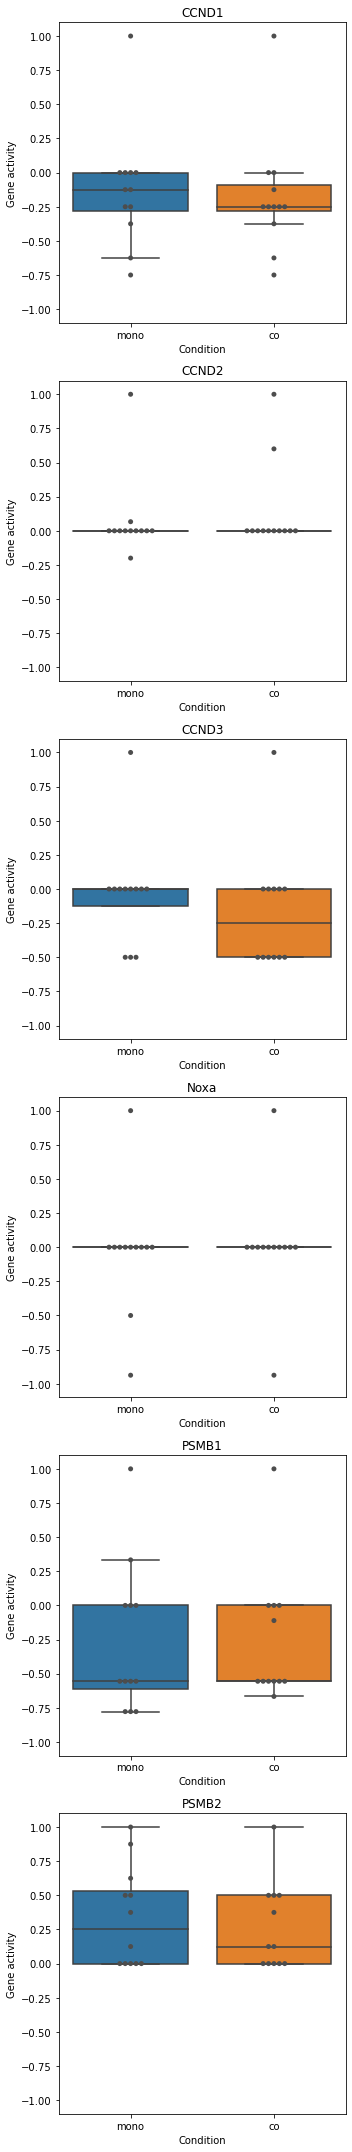

In [15]:
size_unit = 5
fig = matplotlib.pyplot.figure(figsize=(size_unit,size_unit*len(boxplots)), constrained_layout=True)
grid = fig.add_gridspec(len(boxplots), 1)

for i in range(len(boxplots)):
    print('working with {}'.format(boxplots_labels[i]))
    fig.add_subplot(grid[i,0])
    seaborn.boxplot(x="Condition", y="Gene activity", data=boxplots[i], fliersize=0).set_title(boxplots_labels[i])
    seaborn.swarmplot(x="Condition", y="Gene activity", data=boxplots[i], size=5, color=".3", linewidth=0)
    matplotlib.pyplot.ylim([-1.1, 1.1])
matplotlib.pyplot.tight_layout()